### 1. Overview
This notebook follows Sung-youngkyu-PhD-EECS-2022-thesis to reproduce calculations of ZZ-interaction between qubits

Other references include 

"Realization of High-Fidelity CZ and ZZ-Free iSWAP Gates with a Tunable Coupler" DOI: 10.1103/PhysRevX.11.021058

"Tunable Coupling Scheme for Implementing High-Fidelity Two-Qubit Gates" DOI: 10.1103/PhysRevApplied.10.054062

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

### 2. Qubit-Qubit
From section 4.1.2 Parasitic 𝑍𝑍 interaction between transmon qubits

$H/\hbar = (\omega_1 b_1^\dagger b_1 + \frac{\eta_1}{2}b_1^\dagger b_1^\dagger b_1 b_1 + \omega_2 b_2^\dagger b_2 + \frac{\eta_2}{2}b_2^\dagger b_2^\dagger b_2 b_2) + g(b_1+b_1^\dagger)(b_2+b_2^\dagger)$

NOTE: the interaction term is plus sign instead of minus sign as we are using positive $g$ coupling strength

In [2]:
g = 30
nu = -200
w2 = 4e3
w1 = w2+100

N = 3

In [3]:
b1 = tensor(destroy(N), qeye(N))
b2 = tensor(qeye(N), destroy(N))

H = (w1*b1.dag()*b1 + nu/2*b1.dag()*b1.dag()*b1*b1 + w2*b2.dag()*b2 + nu/2*b2.dag()*b2.dag()*b2*b2) + g*(b1+b1.dag())*(b2+b2.dag())

In [4]:
H

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[    0.             0.             0.             0.
     30.             0.             0.             0.
      0.        ]
 [    0.          4000.             0.            30.
      0.            42.42640687     0.             0.
      0.        ]
 [    0.             0.          7800.             0.
     42.42640687     0.             0.             0.
      0.        ]
 [    0.            30.             0.          4100.
      0.             0.             0.            42.42640687
      0.        ]
 [   30.             0.            42.42640687     0.
   8100.             0.            42.42640687     0.
     60.        ]
 [    0.            42.42640687     0.             0.
      0.         11900.             0.            60.
      0.        ]
 [    0.             0.             0.             0.
     42.42640687     0.          8000.             0.
      0.        ]
 [    0.      

In [5]:
def zeta_function(w1):
    N = 5
    g = 30
    nu = -200
    w2 = 4e3

    b1 = tensor(destroy(N), qeye(N))
    b2 = tensor(qeye(N), destroy(N))
    
    H = (w1*b1.dag()*b1 + nu/2*b1.dag()*b1.dag()*b1*b1 + w2*b2.dag()*b2 + nu/2*b2.dag()*b2.dag()*b2*b2) + g*(b1-b1.dag())*(b2-b2.dag())
    
    eigenE = H.eigenstates()[0]
    E00 = eigenE[0]
    E01 = eigenE[1]
    E10 = eigenE[2]
    E02 = eigenE[3]
    E11 = eigenE[4]
    E20 = eigenE[5]

    if w1-w2 <= np.abs(nu):
        zeta = E20 - E01 - E10 + E00
    if w1-w2 > np.abs(nu):
        zeta = E11 - E01 - E10 + E00
    # uncomment following codes and return for sanity check
    # eigenS = H.eigenstates()[1][4]
    # c1 = (tensor(basis(N,1),basis(N,1)).dag()*eigenS).full().reshape(-1)
    # eigenS = H.eigenstates()[1][5]
    # c2 = (tensor(basis(N,1),basis(N,1)).dag()*eigenS).full().reshape(-1)
    return zeta

In [6]:
# For check-up purpose, calculating the overlapping with pure eigenstates before diagonalizing
# zeta_arr = []
# c_arr = []
# c2_arr = []

# w1_arr = np.linspace(w2, w2+500, 100)
# for w in w1_arr:
#     zeta_arr.append(zeta_function(w)[0][1:6])
#     c_arr.append(zeta_function(w)[1])
#     c2_arr.append(zeta_function(w)[2])

In [7]:
# plt.plot(w1_arr-w2, zeta_arr)
# plt.legend(['E01','E10','E02','E11','E20'])
# plt.ylabel('Evergy [MHz]')
# plt.show()
# plt.plot(w1_arr-w2, c_arr, '--')
# plt.plot(w1_arr-w2, c2_arr, '--')
# plt.ylabel('Overlapping')
# plt.xlabel(r'$(\omega_1-\omega_2)/2\pi$ [MHz]')
# plt.legend([r'$\langle E11|11\rangle$',r'$\langle E20|11\rangle$'])
# plt.title(r'Overlapping with $|11\rangle$')
# # plt.yscale('log')

In [8]:
zeta_arr = []
w1_arr = np.linspace(w2, w2+1000, 100)
for w in w1_arr:
    zeta_arr.append(zeta_function(w))

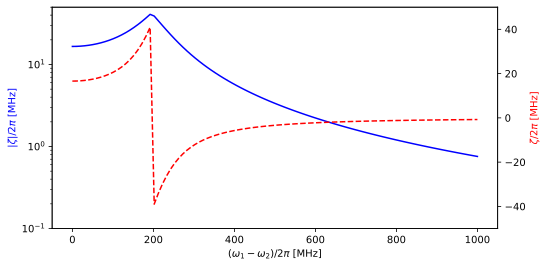

In [9]:
fig, ax1 = plt.subplots(figsize = (8,4))

ax2 = ax1.twinx()
ax1.plot(w1_arr-w2, np.abs(zeta_arr),'b')
ax2.plot(w1_arr-w2, zeta_arr,'r--')

ax1.set_yscale('log')
ax1.set_ylim(0.1,50)
ax2.set_ylim(-50,50)


ax1.set_ylabel(r'$|\zeta|/2\pi$ [MHz]', color='b')
ax2.set_ylabel(r'$\zeta/2\pi$ [MHz]', color='r')
ax1.set_xlabel(r'$(\omega_1-\omega_2)/2\pi$ [MHz]')
plt.show()

### 3.1 Effective coupling strength and capacitance
From Section 4.2 and frequency dependency from "Tunable Coupling Scheme for Implementing High-Fidelity Two-Qubit Gates" eq. 3-5

In [10]:
C1, Cc, C2, C1c, C2c, C12 = 95, 228, 98, 5.36, 5.36, 0.125 #fF
w1, w2, wc = 4000, 4000, np.linspace(4000,7000,100)

d12 = w1-w2
d21 = -d12
d1c = w1-wc
dc1 = -d1c
d2c = w2-wc
dc2 = -d2c

sum12 = w1+w2
sum1c = w1+wc
sum2c = w2+wc

# frequency dependent coupling strength
g1c_cal = 1/2*C1c/np.sqrt(C1*Cc) * np.sqrt(w1*wc)
g2c_cal = 1/2*C2c/np.sqrt(C2*Cc) * np.sqrt(w2*wc)
g12_cal = 1/2*(C12/np.sqrt(C1*C2) + C1c*C2c/np.sqrt(C1*C2*Cc**2)) * np.sqrt(w1*w2)

In [11]:
# print([g1c_cal, g2c_cal, g12_cal])

In [12]:
g_eff = g1c_cal*g2c_cal/2 * (1/d1c + 1/d2c - 1/sum1c - 1/sum2c) + g12_cal #(4.6)

eta = C1c*C2c/(C12*Cc)
delta = ((1/d1c + 1/d2c)/2)**-1
summ = ((1/sum1c + 1/sum2c)/2)**-1
g_tilde = 1/2*(wc/2/delta*eta - wc/2/summ*eta + eta + 1) * C12/np.sqrt(C1*C2) * np.sqrt(w1*w2)

/var/folders/15/cz4yg91d3hd020q_znw8ly1h0000gp/T/ipykernel_66880/1667282010.py:1: RuntimeWarning: divide by zero encountered in divide
  g_eff = g1c_cal*g2c_cal/2 * (1/d1c + 1/d2c - 1/sum1c - 1/sum2c) + g12_cal #(4.6)
/var/folders/15/cz4yg91d3hd020q_znw8ly1h0000gp/T/ipykernel_66880/1667282010.py:4: RuntimeWarning: divide by zero encountered in divide
  delta = ((1/d1c + 1/d2c)/2)**-1
/var/folders/15/cz4yg91d3hd020q_znw8ly1h0000gp/T/ipykernel_66880/1667282010.py:6: RuntimeWarning: divide by zero encountered in divide
  g_tilde = 1/2*(wc/2/delta*eta - wc/2/summ*eta + eta + 1) * C12/np.sqrt(C1*C2) * np.sqrt(w1*w2)


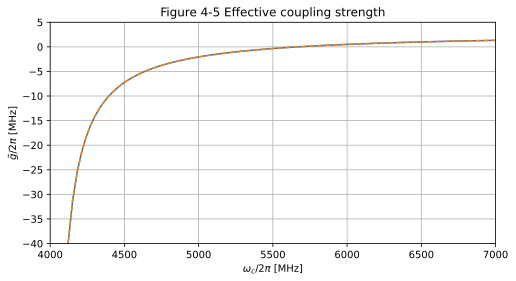

In [13]:
plt.figure(figsize = (8,4))
plt.plot(wc, g_eff)
plt.plot(wc, g_tilde, '--')
plt.ylim(-40, 5)
plt.xlim(4000,7000)
plt.grid()
plt.ylabel(r'$\tilde{g}/2\pi$ [MHz]')
plt.xlabel(r'$\omega_c/2\pi$ [MHz]')
plt.title('Figure 4-5 Effective coupling strength')
plt.show()

### 3.2 Schriffer-Wolff transformation 

In [14]:
N = 2

# Schriffer-Wolff transformation 
sig1z = tensor(sigmaz(),qeye(N),qeye(N))
sig2z = tensor(qeye(N),qeye(N),sigmaz())
sigcz = tensor(qeye(N),sigmaz(),qeye(N))

sig1m = tensor(destroy(N),qeye(N),qeye(N))
sig2m = tensor(qeye(N),qeye(N),destroy(N))
sigcm = tensor(qeye(N),destroy(N),qeye(N))

# C1 = 70
# C2 = 72
# Cc = 200 
# C1c = 4 
# C2c = 4.2 
# C12 = 0.1
C1, Cc, C2, C1c, C2c, C12 = 95, 228, 98, 5.36, 5.36, 0.125 #fF
w1, w2, wc_arr2 = 4000, 4000, np.linspace(4100,7000,100)

g_H_arr = []
g_tilde_arr = []
for wc in wc_arr2:
    d12 = w1-w2
    d21 = -d12
    d1c = w1-wc
    dc1 = -d1c
    d2c = w2-wc
    dc2 = -d2c
    
    sum12 = w1+w2
    sum1c = w1+wc
    sum2c = w2+wc
    
    # frequency dependent coupling strength
    g1c_cal = 1/2*C1c/np.sqrt(C1*Cc) * np.sqrt(w1*wc)
    g2c_cal = 1/2*C2c/np.sqrt(C2*Cc) * np.sqrt(w2*wc)
    g12_cal = 1/2*(C12/np.sqrt(C1*C2) + C1c*C2c/np.sqrt(C1*C2*Cc**2)) * np.sqrt(w1*w2)

    H = 1/2*(w1*sig1z + w2*sig2z + wc*sigcz) + g12_cal*(sig1m.dag()*sig2m + sig1m*sig2m.dag()) +\
        g1c_cal*(sig1m.dag()*sigcm + sig1m*sigcm.dag()) + g2c_cal*(sig2m.dag()*sigcm + sig2m*sigcm.dag())
    
    # factor = g1c_cal/d1c*(sig1m.dag()*sigcm - sig1m*sigcm.dag()) - g1c_cal/sum1c*(sig1m.dag()*sigcm.dag() - sig1m*sigcm)+\
    #          g2c_cal/d2c*(sig2m.dag()*sigcm - sig2m*sigcm.dag()) - g2c_cal/sum2c*(sig2m.dag()*sigcm.dag() - sig2m*sigcm)
    factor = g1c_cal/d1c*(sig1m.dag()*sigcm - sig1m*sigcm.dag()) +\
         g2c_cal/d2c*(sig2m.dag()*sigcm - sig2m*sigcm.dag())
    U = factor.expm()
    H_eff = U.dag()*H*U
    g_H = H_eff.matrix_element(tensor(basis(N,1),basis(N,1),basis(N,0)).dag(), tensor(basis(N,0),basis(N,1),basis(N,1)))
    g_H_arr.append(g_H)

    g_tilde = g1c_cal*g2c_cal/2 * (1/d1c + 1/d2c - 1/sum1c - 1/sum2c) + g12_cal #(4.6)
    g_tilde_arr.append(g_tilde)

g_H_arr = np.array(g_H_arr)
g_tilde_arr = np.array(g_tilde_arr)

/Users/shenzhuo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/shenzhuo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


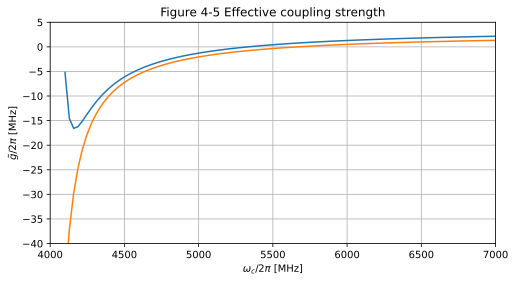

In [15]:
plt.figure(figsize = (8,4))
plt.plot(wc_arr2, g_H_arr)
plt.plot(wc_arr2, g_tilde_arr)
plt.ylim(-40, 5)
plt.xlim(4000,7000)
plt.grid()
plt.ylabel(r'$\tilde{g}/2\pi$ [MHz]')
plt.xlabel(r'$\omega_c/2\pi$ [MHz]')
plt.title('Figure 4-5 Effective coupling strength')
plt.show()

#### 3.2.1 Reduced Hamiltonian

In [16]:
C1, Cc, C2, C1c, C2c, C12 = 95, 228, 98, 5.36, 5.36, 0.125 #fF
w1, w2, wc = 4000, 4000, 5500

d12 = w1-w2
d21 = -d12
d1c = w1-wc
dc1 = -d1c
d2c = w2-wc
dc2 = -d2c

sum12 = w1+w2
sum1c = w1+wc
sum2c = w2+wc

# frequency dependent coupling strength
g1c_cal = 1/2*C1c/np.sqrt(C1*Cc) * np.sqrt(w1*wc)
g2c_cal = 1/2*C2c/np.sqrt(C2*Cc) * np.sqrt(w2*wc)
g12_cal = 1/2*(C12/np.sqrt(C1*C2) + C1c*C2c/np.sqrt(C1*C2*Cc**2)) * np.sqrt(w1*w2)

w1_tilde = w1 + g1c_cal/d1c
w2_tilde = w2 + g2c_cal/d2c
g_tilde = g1c_cal*g2c_cal/2 * (1/d1c + 1/d2c - 1/sum1c - 1/sum2c) + g12_cal

H_reduced = 1/2 * (w1_tilde*sig1z + w2_tilde*sig2z + wc*sigcz) + g_tilde*(sig1m.dag()*sig2m + sig1m*sig2m.dag())

g_H = H_reduced.matrix_element(tensor(basis(N,0),basis(N,1),basis(N,1)).dag(), tensor(basis(N,1),basis(N,1),basis(N,0)))
print(f'g from reduced H: {g_H}' )
print(f'g from calculation: {g_tilde}')

g from reduced H: (-0.34162808360058783+0j)
g from calculation: -0.34162808360058783


In [17]:
H_reduced

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 6.74994350e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.74999956e+03  0.00000000e+00  0.00000000e+00
  -3.41628084e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.24994350e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.75000044e+03
   0.00000000e+00  0.00000000e+00 -3.41628084e-01  0.00000000e+00]
 [ 0.00000000e+00 -3.41628084e-01  0.00000000e+00  0.00000000e+00
   2.75000044e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.24994350e+03  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.41628084e-01
   0.00000000e+00  0.00000000e+00 

### 4. Qubit-Coupler-Qubit
From section 4.3 Multi-level tunable coupler

$H/\hbar = \sum_i (\omega_i b_i^\dagger b_i + \frac{\eta_i}{2}b_i^\dagger b_i^\dagger b_i b_i)
            + \sum_{i<j} g_{ij}(b_i+b_i^\dagger)(b_j+b_j^\dagger); $

NOTE: use plus sign with positive $g$ coupling strength

In [18]:
ZZ_arr = []
wc_arr = np.linspace(4400, 7000, 100)

N = 5

C1, Cc, C2, C1c, C2c, C12 = 95, 228, 98, 5.36, 5.36, 0.125 #fF
eta1, etac, eta2 = -220, -90, -210
    
w1, w2 = 4160, 4000

b1 = tensor(destroy(N), qeye(N), qeye(N))
b2 = tensor(qeye(N), qeye(N), destroy(N))
bc = tensor(qeye(N), destroy(N), qeye(N))

E_arr = []
c_arr = []
ZZ_arr = []
for wc in wc_arr:
    # frequency dependent coupling strength
    g1c_cal = 1/2*C1c/np.sqrt(C1*Cc) * np.sqrt(w1*wc)
    g2c_cal = 1/2*C2c/np.sqrt(C2*Cc) * np.sqrt(w2*wc)
    g12_cal = 1/2*(C12/np.sqrt(C1*C2) + C1c*C2c/np.sqrt(C1*C2*Cc**2)) * np.sqrt(w1*w2)

    H = w1*b1.dag()*b1 + eta1/2*b1.dag()*b1.dag()*b1*b1 + w2*b2.dag()*b2 + eta2/2*b2.dag()*b2.dag()*b2*b2 + wc*bc.dag()*bc + etac/2*bc.dag()*bc.dag()*bc*bc +\
        g12_cal*(b1+b1.dag())*(b2+b2.dag()) + g1c_cal*(b1+b1.dag())*(bc+bc.dag()) + g2c_cal*(bc+bc.dag())*(b2+b2.dag())
    
    eigenE, eigenS = H.eigenstates()
    E000 = eigenE[0]
    E001 = eigenE[1]
    E100 = eigenE[2]
    E010 = eigenE[3]
    
    E002 = eigenE[4]
    E200 = eigenE[5]
    E101 = eigenE[6]
    E011 = eigenE[7]
    E110 = eigenE[8]
    E020 = eigenE[9]
    E_arr.append(eigenE)

    # for checking eigenstate overlapping
    # x,y,z = 1,0,1
    # c = eigenS[6].dag()*tensor(basis(N,x),basis(N,y),basis(N,z)).full()
    # c_arr.append(np.abs(c[0][0]))

    ZZ = (E101 - E001) - (E100 - E000)
    ZZ_arr.append(ZZ)

E_arr = np.array(E_arr)
ZZ_arr = np.array(ZZ_arr)

In [19]:
# plt.plot(wc_arr, E_arr[:,1:10])
# plt.legend(['E001','E100','E010','E002','E200','E101','E011','E110','E020'])
# plt.ylim(7000,12000)
# plt.yscale('log')

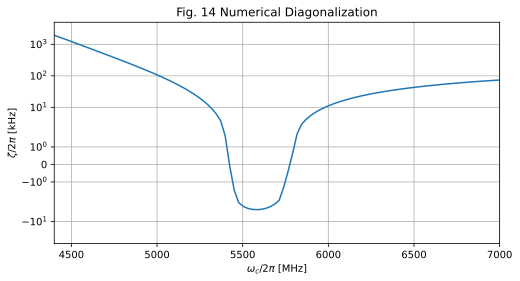

In [20]:
plt.figure(figsize = (8,4))
plt.plot(wc_arr, ZZ_arr*1000)
plt.xlim(4400,7000)
plt.ylim(-50,5000)
plt.yscale('symlog')
plt.grid()
plt.ylabel(r'$\zeta/2\pi$ [kHz]')
plt.xlabel(r'$\omega_c/2\pi$ [MHz]')
plt.title('Fig. 14 Numerical Diagonalization')
plt.show()

### 5. Purterbation
4th-order perturbation shown in APPENDIX E

In [21]:
w1, w2 = 4160, 4000
wc = np.linspace(4400, 7000, 400)
eta1, etac, eta2 = -220, -90, -210

C1, Cc, C2, C1c, C2c, C12 = 95, 228, 98, 5.36, 5.36, 0.125 #fF
g1c = 1/2*C1c/np.sqrt(C1*Cc) * np.sqrt(w1*wc)
g2c = 1/2*C2c/np.sqrt(C2*Cc) * np.sqrt(w2*wc)
g12 = 1/2*(C12/np.sqrt(C1*C2) + C1c*C2c/np.sqrt(C1*C2*Cc**2)) * np.sqrt(w1*w2)

d12 = w1-w2
d21 = -d12
d1c = w1-wc
dc1 = -d1c
d2c = w2-wc
dc2 = -d2c

sum12 = w1+w2
sum1c = w1+wc
sum2c = w2+wc

In [22]:
ZRW2 = g12**2 * (2/(d12-eta2) + 2/(d21-eta1))
ZRW3 = g1c*g2c*g12* (4/(d12-eta2)/d1c + 4/(d21-eta1)/d2c + 2/d1c/d2c - 2/d12/d1c - 2/d21/d2c)
ZRW4 = g1c**2 * g2c**2 * (2*(1/d1c+1/d2c)**2 * 1/(d1c+d2c-etac) + 2/d2c**2/(d21-eta1) + 2/d1c**2/(d12-eta2) 
                         -(1/d2c+1/d12)/d1c**2 - (1/d1c+1/d21)/d2c**2)

ZCRW2 = g12**2 * (-4/(sum12+eta1+eta2) + 2/(sum12+eta1) + 2/(sum12+eta2))

E3_101 = g1c*g2c*g12 * (8/(sum1c+eta1)/(sum12+eta1+eta2) + 8/(sum1c+eta1)/(sum2c+eta2) + 8/(sum2c+eta2)/(sum12+eta1+eta2)
                       -4/d2c/(sum1c+eta1) - 4/(d12-eta2)/(sum2c+eta2) - 4/(d21-eta1)/(sum1c+eta1)
                       -4/d1c/(sum2c+eta2) + 2/d1c/sum12 + 2/d2c/sum12)
E3_100 = g1c*g2c*g12 * (4/(sum1c+eta1)/(sum12+eta1) + 4/(sum12+eta1)/sum2c
                       +4/(sum1c+eta1)/sum2c - 2/d1c/sum2c - 2/d12/sum2c)
E3_001 = g1c*g2c*g12 * (4/(sum2c+eta2)/(sum12+eta2) + 4/(sum12+eta2)/sum1c + 4/(sum2c+eta2)/sum1c - 2/d2c/sum1c - 2/d21/sum1c)
E3_000 = g1c*g2c*g12 * (2/sum1c/sum12 + 2/sum1c/sum2c + 2/sum2c/sum12)

ZCRW3 = (E3_101-E3_001) - (E3_100-E3_000)

E4_101_1 = g1c**2*g2c**2 * (-4/d2c**2/(d12+eta1+2*wc+etac) - 4/d1c**2/(d21+eta2+2*wc+etac) + 1/d1c**2/sum12 + 1/d2c**2/sum12
                           -4/d2c/(d21-eta1)/(sum1c+eta1) - 4/d1c/(d12-eta2)/(sum2c+eta2) - 4/d2c/(2*wc+etac)/d1c
                           +2/d1c/d2c/sum12 + 2/d2c**2/(sum1c+eta1) + 2/d1c**2/(sum2c+eta2)) +\
            -2*g2c**4/d2c**2/(2*wc+etac) - 2*g1c**4/d1c**2/(2*wc+etac) +\
            2*g1c**4/d1c**2/(sum1c+eta1) + 2*g2c**4/d2c**2/(sum2c+eta2)
E4_100_1 = g1c**2*g2c**2 * (-2/d1c**2/(d21+2*wc+etac) - 2/(d1c*d12*sum2c) + 1/d1c**2/sum2c) +\
            2*g1c**4/d1c**2 * (-1/(2*wc+etac) + 1/(sum1c+eta1))
E4_001_1 = g1c**2*g2c**2 * (-2/d2c**2/(d12+2*wc+etac) - 2/(d2c*d21*sum1c) + 1/d2c**2/sum1c) +\
            2*g2c**4/d2c**2 * (-1/(2*wc+etac) + 1/(sum2c+eta2))
ZCRW4_1 = (E4_101_1 - E4_001_1) - E4_100_1

E4_101_2 = g1c**2*g2c**2 * (8/d2c/(d12+eta1+2*wc+etac)/(sum1c+eta1) + 8/d1c/(d21+eta2+2*wc+etac)/(sum2c+eta2)
                           +8/d2c/(2*wc+etac)/(sum1c+eta1) + 8/d1c/(2*wc+etac)/(sum2c+eta2)
                           +2/(d12-eta2)/(sum2c+eta2)**2 + 2/(d21-eta1)/(sum1c+eta1)**2 - 2/d2c/(sum1c+eta1)**2 - 2/d1c/(sum2c+eta2)**2) +\
            8*g2c**4/d2c/(2*wc+etac)/(sum2c+eta2) + 8*g1c**4/d1c/(2*wc+etac)/(sum1c+eta1) +\
            -2*g1c**4/d1c/(sum1c+eta1)**2 - 2*g2c**4/d2c/(sum2c+eta2)**2
E4_100_2 = g1c**2*g2c**2 * (4/d1c/sum2c/(d21+2*wc+etac) + 4/d1c/sum2c/(2*wc+etac) + 1/d12/sum2c**2 - 1/d1c/sum2c**2) +\
            g1c**4 * (8/d1c/(2*wc+etac)/(sum1c+eta1) - 2/d1c/(sum1c+eta1)**2)
E4_001_2 = g1c**2*g2c**2 * (4/d2c/sum1c/(d12+2*wc+etac) + 4/d2c/sum1c/(2*wc+etac) + 1/d21/sum1c**2 - 1/d2c/sum1c**2) +\
            g2c**4 * (8/d2c/(2*wc+etac)/(sum2c+eta2) - 2/d2c/(sum2c+eta2)**2)
ZCRW4_2 = (E4_101_2 - E4_001_2) - E4_100_2

ZCRW4 = ZCRW4_1 + ZCRW4_2

ZZ4 = ZRW2 + ZRW3 + ZRW4 + ZCRW2 + ZCRW3 + ZCRW4

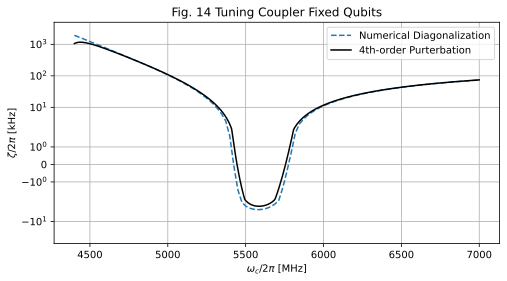

In [23]:
plt.figure(figsize = (8,4))
plt.plot(wc_arr, ZZ_arr*1000, '--', label = 'Numerical Diagonalization')
plt.plot(wc, ZZ4*1000, 'black', label = '4th-order Purterbation')
plt.ylim(-50,5000)
plt.yscale('symlog')
plt.grid()
plt.ylabel(r'$\zeta/2\pi$ [kHz]')
plt.xlabel(r'$\omega_c/2\pi$ [MHz]')
plt.title('Fig. 14 Tuning Coupler Fixed Qubits')
plt.legend()
plt.show()

### 6. Tuning QB2 and Coupler
Tuning qubit 2 and coupler frequencies while fixing qubit 1 frequency.

In [24]:
ZZ_arr = []
w1 = 4000
w2_arr = np.linspace(3000, 5000, 60)
wc_arr = np.linspace(4000, 7500, 200)

N = 3

C1, Cc, C2, C1c, C2c, C12 = 95, 228, 98, 5.36, 5.36, 0.125 #fF
eta1, etac, eta2 = -220, -90, -210

b1 = tensor(destroy(N), qeye(N), qeye(N))
b2 = tensor(qeye(N), qeye(N), destroy(N))
bc = tensor(qeye(N), destroy(N), qeye(N))

ZZ_2D = []

for w2 in w2_arr:
    ZZ_arr = []
    
    for wc in wc_arr:
        # frequency dependent coupling strength
        g1c_cal = 1/2*C1c/np.sqrt(C1*Cc) * np.sqrt(w1*wc)
        g2c_cal = 1/2*C2c/np.sqrt(C2*Cc) * np.sqrt(w2*wc)
        g12_cal = 1/2*(C12/np.sqrt(C1*C2) + C1c*C2c/np.sqrt(C1*C2*Cc**2)) * np.sqrt(w1*w2)
    
        H = w1*b1.dag()*b1 + eta1/2*b1.dag()*b1.dag()*b1*b1 + w2*b2.dag()*b2 + eta2/2*b2.dag()*b2.dag()*b2*b2 + wc*bc.dag()*bc + etac/2*bc.dag()*bc.dag()*bc*bc +\
            g12_cal*(b1+b1.dag())*(b2+b2.dag()) + g1c_cal*(b1+b1.dag())*(bc+bc.dag()) + g2c_cal*(bc+bc.dag())*(b2+b2.dag())
        
        eigenE, eigenS = H.eigenstates()
        if (w1 > w2):
            E000 = eigenE[0]
            E001 = eigenE[1]
            E100 = eigenE[2]
            E010 = eigenE[3]

            if (np.abs(w1-w2) < np.abs(eta1)) or (np.abs(w1-w2) < np.abs(eta2)):
                E002 = eigenE[4]
                E200 = eigenE[5]
                E101 = eigenE[6]
                E011 = eigenE[7]
                E110 = eigenE[8]
                E020 = eigenE[9]
            else:
                E002 = eigenE[4]
                E101 = eigenE[5]
                E200 = eigenE[6]
                E011 = eigenE[7]
                E110 = eigenE[8]
                E020 = eigenE[9]
                
        if (w1 < w2):
            E000 = eigenE[0]
            E100 = eigenE[1]
            E001 = eigenE[2]
            E010 = eigenE[3]

            if (np.abs(w1-w2) < np.abs(eta1)) or (np.abs(w1-w2) < np.abs(eta2)):
                E200 = eigenE[4]
                E002 = eigenE[5]
                E101 = eigenE[6]
                E110 = eigenE[7]
                E011 = eigenE[8]
                E020 = eigenE[9]
            else:
                E200 = eigenE[4]
                E101 = eigenE[5]
                E002 = eigenE[6]
                E110 = eigenE[7]
                E011 = eigenE[8]
                E020 = eigenE[9]
    
        ZZ = (E101 - E001) - (E100 - E000)
        ZZ_arr.append(ZZ)
    
    ZZ_arr = np.array(ZZ_arr)
    ZZ_2D.append(ZZ_arr)

ZZ_2D = np.array(ZZ_2D)

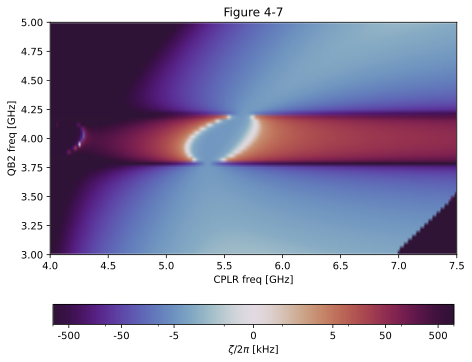

In [25]:
plt.figure(figsize=(8,6))
plt.imshow(ZZ_2D*1e3, interpolation='none', origin='lower', extent=[4, 7.5, 3, 5],
              cmap='twilight_shifted', norm='symlog')

plt.title('Figure 4-7')
plt.xlabel('CPLR freq [GHz]')
plt.ylabel('QB2 freq [GHz]')
plt.colorbar(ticks = [-500, -50, -5, 0, 5, 50, 500], format='%.0f', orientation='horizontal', shrink=0.9, 
                 label = r'$\zeta/2\pi$ [kHz]')
plt.clim(-1000,1000)